# Imports

In [398]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Desarrollo

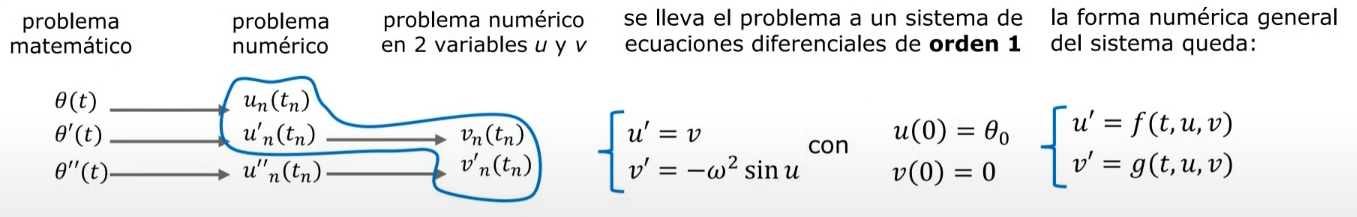

## Valores de aceleracion y radio de la trayectoria en la curva

In [399]:
aceleracion_en_curva = 10
radio = 5

## Funcion difetencial f de la curva

In [400]:
def f_curva (timepo, angulo, velocidad_angular):
  return -(aceleracion_en_curva / radio) * np.sin(angulo)

## Valores de la trayectoria recta

In [401]:
m = 800
aceleracion_recta = 5

## Funcion diferencial f de la la trayectoria recta

In [402]:
#Porque F depende de t???
def f_fuerza(t):
    return 1.5

In [403]:
def f_recta(tiempo, posicion, velocidad):
  return  f_fuerza(tiempo) / m

## Trayectoria

### Tools de funciones

In [404]:
def pasar_a_radianes(angulo):
    return math.pi/180 * angulo 

print(pasar_a_radianes(180))

3.141592653589793


In [405]:
#El angulo que recibe no esta representado en radianes
def obtener_radio_de_una_curva(longitud, angulo):
    return longitud/pasar_a_radianes(angulo)

print(obtener_radio_de_una_curva(19, 108))

10.079813062486705


In [406]:
#El angulo que recibe no debe de estar representado en radianes
def punto_final_de_una_recta(punto_inicial, longitud, angulo):
    angulo_rad = pasar_a_radianes(angulo)
    x = math.cos(angulo_rad) * longitud
    y = math.sin(angulo_rad) * longitud
    x0 = punto_inicial[0]
    y0 = punto_inicial[1]
    return np.array([ x + x0 , y + y0 ])

print(punto_final_de_una_recta(np.array([0, 0]), 1, 45))

[0.70710678 0.70710678]


In [407]:
print(punto_final_de_una_recta(np.array([0, 0]), 164.16, 16))

[157.80072001  45.24862833]


In [408]:
#El angulo que recibe no debe de estar representado en radianes
def punto_final_de_una_curva(punto_inicial, longitud, angulo_de_barrido, angulo_inicial):
    radio = obtener_radio_de_una_curva(longitud, angulo_de_barrido)
    angulo_barrido_rad = pasar_a_radianes(angulo_de_barrido)
    angulo_inicial_rad = pasar_a_radianes(angulo_inicial)
    x = (math.cos(angulo_inicial_rad + angulo_barrido_rad)) * radio
    y = (math.sin(angulo_inicial_rad + angulo_barrido_rad)) * radio
    
    x0 = punto_inicial[0]
    y0 = punto_inicial[1]
    return np.array([ x + x0 , y + y0 ])

print(punto_final_de_una_curva(np.array([157.8, 45.2]), 40, 123.1, 16))

[143.72779408  57.38972715]


In [410]:
def esta_dentro_del_limite(punto1, punto2, punto_a_evaluar, operacion):
    x1, y1 = punto1
    x2, y2 = punto2

    # Calcular la pendiente
    m = (y2 - y1) / (x2 - x1)

    # Calcular el término independiente
    b = y1 - m * x1

    if operacion == "<=":
        return punto_a_evaluar[1] <= m * punto_a_evaluar[0] + b
    elif operacion == ">=" :
        return punto_a_evaluar[1] >= m * punto_a_evaluar[0] + b

In [411]:
print(esta_dentro_del_limite([1, 0], [0, 1], [1, 1], "<="))

False


In [412]:
#la recta estara limitada entre el punto1 y punto2
#se usara para elegir el punto inicial 
def punto_aleatorio_en_un_segmento(punto1, punto2):

    p1 = np.array(punto1)
    p2 = np.array(punto2)

    #vector director de la recta
    vector_director = p2 - p1

    # Generar un valor aleatorio entre 0 y 1 para determinar la posición del punto
    t = np.random.rand()

    #calcular el punto aleatorio en el segmento
    punto_aleatorio = p1 + t * vector_director

    return np.array(punto_aleatorio)

In [413]:
def calcular_velocidad_angular(v_x, v_y, r):
    v_t = math.sqrt(v_x**2 + v_y**2)
    omega = v_t / r
    return omega

In [414]:
def calcular_velocidad_angular(v_x, v_y, r):
    v_t = math.sqrt(v_x**2 + v_y**2)
    omega = v_t / r
    return omega

In [415]:
RADIO_INTERNO_PRIMERA_CURVA = obtener_radio_de_una_curva(19.20, 108)
RADIO_EXTERNO_PRIMERA_CURVA = obtener_radio_de_una_curva(40.80, 123.1)
RADIO_INTERNO_SEGUNDA_CURVA = obtener_radio_de_una_curva(36.90, 76.2)
RADIO_EXTERNO_SEGUNDA_CURVA = obtener_radio_de_una_curva(49.80, 65)

### Implementacion del diseño de trayectorias

In [416]:
def condicion_de_corte_limite(limite, operacion, y):
    if operacion == "<":
        return y < limite
    elif operacion== ">":
        return y > limite

In [417]:
def range_kutta_de_orden_4(f, t0, y0, u0, h, limite, operacion):
    t = t0
    y = y0
    u = u0
    resultados = [(t, y, u)]
    while condicion_de_corte_limite(limite, operacion, y):
        m1 = u
        k1 = f(t, y, u)

        m2 = u + (h / 2) * k1
        k2 = f(t + (h / 2), y + m1 * (h / 2), u + (h / 2) * k1)

        m3 = u + (h / 2) * k2
        k3 = f(t + (h / 2), y + m2 * (h / 2), u + (h / 2) * k2)

        m4 = u + h * k3
        k4 = f(t + h, y + m3 * h, u + h * k3)

        y += (h / 6) * (m1 + 2 * m2 + 2 * m3 + m4)
        u += (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        t += h
        
        resultados.append((t, y, u))
    return resultados
    

In [418]:
def range_kutta_de_orden_4_aux(f, t0, y0, u0, h, n):
    t = t0
    y = y0
    u = u0
    resultados = [(t, y, u)]
    for i in range(n-1):
        m1 = u
        k1 = f(t, y, u)

        m2 = u + (h / 2) * k1
        k2 = f(t + (h / 2), y + m1 * (h / 2), u + (h / 2) * k1)

        m3 = u + (h / 2) * k2
        k3 = f(t + (h / 2), y + m2 * (h / 2), u + (h / 2) * k2)

        m4 = u + h * k3
        k4 = f(t + h, y + m3 * h, u + h * k3)

        y += (h / 6) * (m1 + 2 * m2 + 2 * m3 + m4)
        u += (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        t += h
        
        resultados.append((t, y, u))
    return resultados

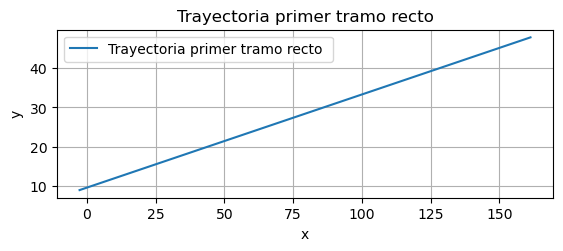

In [419]:
#punto de inicio
p_ini_der_1er_tramo = np.array([0,0])
p_ini_izq_1er_tramo = punto_final_de_una_recta(p_ini_der_1er_tramo, 17.46, (180-107))
p_ini_izq_1er_tramo = [-1, 1]*p_ini_izq_1er_tramo
p_inicial_primer_tramo = punto_aleatorio_en_un_segmento(p_ini_der_1er_tramo, p_ini_izq_1er_tramo)

#punto final
p_final_izq_1er_tramo = punto_final_de_una_recta(p_ini_izq_1er_tramo, 154.50, 16.7)
p_final_der_1er_tramo = punto_final_de_una_recta(p_ini_der_1er_tramo, 164.16, 16)
p_final_primer_tramo = punto_aleatorio_en_un_segmento(p_final_izq_1er_tramo, p_final_der_1er_tramo)

#angulo de trayectoria
adyacente = abs(p_inicial_primer_tramo[0] - p_final_primer_tramo[0])
opuesto = abs(p_inicial_primer_tramo[1] - p_final_primer_tramo[1])
angulo_rad = math.atan2(opuesto, adyacente)

#velocidad
modulo_vel_inicial = random.uniform(62.2, 84.7222)
vel_ini_x = modulo_vel_inicial*math.cos(angulo_rad)
vel_ini_y = modulo_vel_inicial*math.sin(angulo_rad)

t = 0
h = 0.1
x_result_1er_tramo = range_kutta_de_orden_4(f_recta, t, p_inicial_primer_tramo[0], vel_ini_x, h, p_final_der_1er_tramo[0], "<")
y_result_1er_tramo = range_kutta_de_orden_4_aux(f_recta, t, p_inicial_primer_tramo[1], vel_ini_y, h, len(x_result_1er_tramo))

pos_x_1er_tramo = [tupla[1] for tupla in x_result_1er_tramo]
pos_y_1er_tramo = [tupla[1] for tupla in y_result_1er_tramo]
vel_x_1er_tramo = [tupla[2] for tupla in x_result_1er_tramo]
vel_y_1er_tramo = [tupla[2] for tupla in y_result_1er_tramo]
t_final_1er_tramo = [tupla[0] for tupla in y_result_1er_tramo]
t_final_1er_tramo = t_final_1er_tramo[-1]

plt.subplot(2, 1, 1)
plt.plot(pos_x_1er_tramo, pos_y_1er_tramo, label="Trayectoria primer tramo recto ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria primer tramo recto")
plt.legend()
plt.grid()
plt.show()

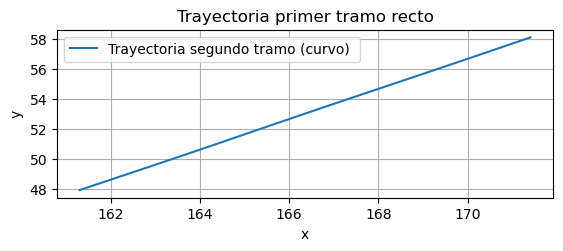

In [420]:
#Radio y aceleracion en curva
radio = random.uniform(RADIO_INTERNO_PRIMERA_CURVA, RADIO_EXTERNO_PRIMERA_CURVA)
aceleracion_en_curva = random.uniform(9.8, 9.8*6) #SE DEBE DE OBTENER LA ACELERACION CON LA FORMULA DE F(t)  QUE TENIA EN EL TRAMO RECTO

#Puntos finales
pos_x_final_1er_tramo = pos_x_1er_tramo[-1]
pos_y_final_1er_tramo = pos_y_1er_tramo[-1]
p_final_der_2do_tramo = punto_final_de_una_curva(p_final_der_1er_tramo, 40.80, 123.1, 16)

#Velocidad angular
vel_angular_ini_2do_tramo = calcular_velocidad_angular(vel_x_1er_tramo[-1], vel_y_1er_tramo[-1], radio)

#Trayectoria curva
y_result_2do_tramo = range_kutta_de_orden_4(f_curva, t_final_1er_tramo, pos_y_final_1er_tramo, vel_angular_ini_2do_tramo, h, p_final_der_2do_tramo[1], "<")
x_result_2do_tramo = range_kutta_de_orden_4_aux(f_curva, t_final_1er_tramo, pos_x_final_1er_tramo, vel_angular_ini_2do_tramo, h, len(y_result_2do_tramo))

#obtener datos
pos_x_2do_tramo = [tupla[1] for tupla in x_result_2do_tramo]
pos_y_2do_tramo = [tupla[1] for tupla in y_result_2do_tramo]
vel_ang_x_2do_tramo = [tupla[2] for tupla in x_result_2do_tramo]
vel_ang_y_2do_tramo = [tupla[2] for tupla in y_result_2do_tramo]
t_final_2do_tramo = [tupla[0] for tupla in y_result_2do_tramo]
t_final_2do_tramo = t_final_2do_tramo[-1]

plt.subplot(2, 1, 1)
plt.plot(pos_x_2do_tramo, pos_y_2do_tramo, label="Trayectoria segundo tramo (curvo) ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria primer tramo recto")
plt.legend()
plt.grid()
plt.show()

In [421]:
def calcular_velocidad(omega, r, angulo_rad):
    v = omega * r
    vel_x = v*math.cos(angulo_rad)
    vel_y = v*math.sin(angulo_rad)
    return vel_x, vel_y

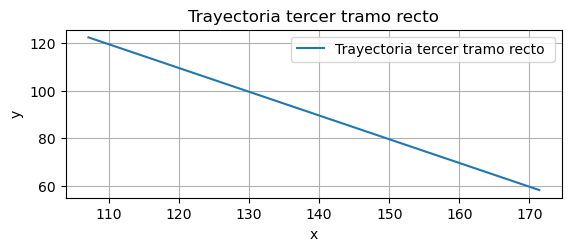

In [422]:
#puto final 3er tramo
p_final_izq_2do_tramo = punto_final_de_una_curva(p_final_izq_1er_tramo, 19.2, 108, 16.7)
p_final_izq_3er_tramo = punto_final_de_una_recta(p_final_izq_2do_tramo, 63.54, 108)
p_final_der_3er_tramo = punto_final_de_una_recta(p_final_der_2do_tramo, 63.54, 123.1)
p_final_del_3er_tramo = punto_aleatorio_en_un_segmento(p_final_izq_3er_tramo, p_final_der_3er_tramo)

pos_x_final_2do_tramo = pos_x_2do_tramo[-1]
pos_y_final_2do_tramo = pos_y_2do_tramo[-1]

#angulo de trayectoria
adyacente = abs(pos_x_final_2do_tramo - p_final_del_3er_tramo[0])
opuesto = abs(pos_y_final_2do_tramo - p_final_del_3er_tramo[1])
angulo_rad = math.atan2(opuesto, adyacente)

#calculo_de_velocidad
vel_ini_x, vel_ini_y = calcular_velocidad(max(vel_ang_x_2do_tramo[-1], vel_ang_y_2do_tramo[-1]), radio, angulo_rad)

vel_ini_x = - vel_ini_x

#trayectoria
x_result_3er_tramo = range_kutta_de_orden_4(f_recta, t_final_2do_tramo, pos_x_final_2do_tramo, vel_ini_x, h, p_final_del_3er_tramo[0], ">")
y_result_3er_tramo = range_kutta_de_orden_4_aux(f_recta, t_final_2do_tramo, pos_y_final_2do_tramo, vel_ini_y, h, len(x_result_3er_tramo))


pos_x_3er_tramo = [tupla[1] for tupla in x_result_3er_tramo]
pos_y_3er_tramo = [tupla[1] for tupla in y_result_3er_tramo]
vel_x_3er_tramo = [tupla[2] for tupla in x_result_3er_tramo]
vel_y_3er_tramo = [tupla[2] for tupla in y_result_3er_tramo]
t_final_3er_tramo = [tupla[0] for tupla in y_result_3er_tramo]
t_final_3er_tramo = t_final_3er_tramo[-1]

plt.subplot(2, 1, 1)
plt.plot(pos_x_3er_tramo, pos_y_3er_tramo, label="Trayectoria tercer tramo recto ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria tercer tramo recto")
plt.legend()
plt.grid()
plt.show()

122.51019196868008
101.74047912020926


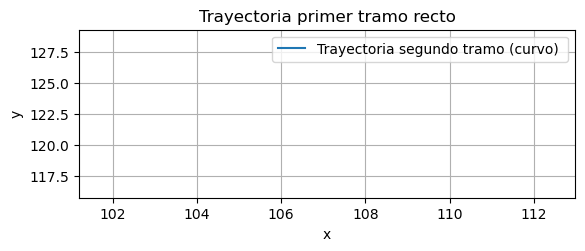

In [423]:
#Radio y aceleracion en curva
radio = random.uniform(RADIO_INTERNO_SEGUNDA_CURVA, RADIO_EXTERNO_SEGUNDA_CURVA)
aceleracion_en_curva = random.uniform(9.8, 9.8*6) #SE DEBE DE OBTENER LA ACELERACION CON LA FORMULA DE F(t)  QUE TENIA EN EL TRAMO RECTO

#Puntos finales
pos_x_final_3er_tramo = pos_x_3er_tramo[-1]
pos_y_final_3er_tramo = pos_y_3er_tramo[-1]
p_final_der_4to_tramo = punto_final_de_una_curva(p_final_der_3er_tramo, 36.90, 76.2, 123.1)
print(pos_y_final_3er_tramo)
print(p_final_der_4to_tramo[1])


#Velocidad angular
vel_angular_ini_4to_tramo = calcular_velocidad_angular(vel_x_3er_tramo[-1], vel_y_3er_tramo[-1], radio)

#Trayectoria curva
y_result_4to_tramo = range_kutta_de_orden_4(f_curva, t_final_3er_tramo, pos_y_final_3er_tramo, vel_angular_ini_4to_tramo, h, p_final_der_4to_tramo[1], "<")
x_result_4to_tramo = range_kutta_de_orden_4_aux(f_curva, t_final_3er_tramo, pos_x_final_3er_tramo, vel_angular_ini_4to_tramo, h, len(y_result_4to_tramo))

#obtener datos
pos_x_4to_tramo = [tupla[1] for tupla in x_result_4to_tramo]
pos_y_4to_tramo = [tupla[1] for tupla in y_result_4to_tramo]
vel_ang_x_4to_tramo = [tupla[2] for tupla in x_result_4to_tramo]
vel_ang_y_4to_tramo = [tupla[2] for tupla in y_result_4to_tramo]
t_final_4to_tramo = [tupla[0] for tupla in y_result_4to_tramo]
t_final_4to_tramo = t_final_4to_tramo[-1]

plt.subplot(2, 1, 1)
plt.plot(pos_x_4to_tramo, pos_y_4to_tramo, label="Trayectoria segundo tramo (curvo) ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria primer tramo recto")
plt.legend()
plt.grid()
plt.show()

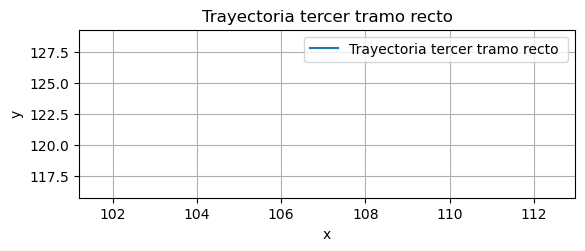

In [424]:
#puto final 5to tramo
p_final_izq_4to_tramo = punto_final_de_una_curva(p_final_izq_3er_tramo, 49.80, 65, 108)
p_final_izq_5to_tramo = punto_final_de_una_recta(p_final_izq_4to_tramo, 70.64, 65)
p_final_der_5to_tramo = punto_final_de_una_recta(p_final_der_4to_tramo, 70.44, 76.2)
p_final_del_5to_tramo = punto_aleatorio_en_un_segmento(p_final_izq_5to_tramo, p_final_der_5to_tramo)

pos_x_final_4to_tramo = pos_x_4to_tramo[-1]
pos_y_final_4to_tramo = pos_y_4to_tramo[-1]

#angulo de trayectoria
adyacente = abs(pos_x_final_4to_tramo - p_final_del_5to_tramo[0])
opuesto = abs(pos_y_final_4to_tramo - p_final_del_5to_tramo[1])
angulo_rad = math.atan2(opuesto, adyacente)

#calculo_de_velocidad
vel_ini_x, vel_ini_y = calcular_velocidad(max(vel_ang_x_4to_tramo[-1], vel_ang_y_4to_tramo[-1]), radio, angulo_rad)

#trayectoria
x_result_5to_tramo = range_kutta_de_orden_4(f_recta, t_final_4to_tramo, pos_x_final_4to_tramo, vel_ini_x, h, p_final_del_5to_tramo[0], "<")
y_result_5to_tramo = range_kutta_de_orden_4_aux(f_recta, t_final_4to_tramo, pos_y_final_4to_tramo, vel_ini_y, h, len(x_result_5to_tramo))


pos_x_5to_tramo = [tupla[1] for tupla in x_result_5to_tramo]
pos_y_5to_tramo = [tupla[1] for tupla in y_result_5to_tramo]
vel_x_5to_tramo = [tupla[2] for tupla in x_result_5to_tramo]
vel_y_5to_tramo = [tupla[2] for tupla in y_result_5to_tramo]
t_final_5to_tramo = [tupla[0] for tupla in y_result_5to_tramo]
t_final_5to_tramo = t_final_5to_tramo[-1]

plt.subplot(2, 1, 1)
plt.plot(pos_x_5to_tramo, pos_y_5to_tramo, label="Trayectoria tercer tramo recto ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria tercer tramo recto")
plt.legend()
plt.grid()
plt.show()

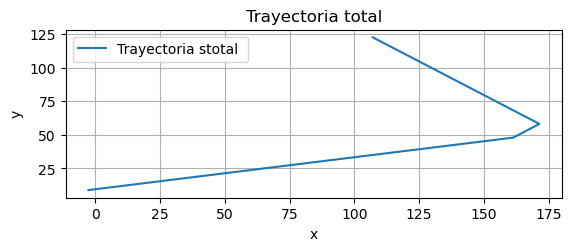

In [425]:
x_pos_final = pos_x_1er_tramo + pos_x_2do_tramo + pos_x_3er_tramo + pos_x_4to_tramo + pos_x_5to_tramo
y_pos_final = pos_y_1er_tramo + pos_y_2do_tramo + pos_y_3er_tramo + pos_y_4to_tramo + pos_y_5to_tramo
plt.subplot(2, 1, 1)
plt.plot(x_pos_final, y_pos_final, label="Trayectoria stotal ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria total")
plt.legend()
plt.grid()
plt.show()